In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile
import os
import xgboost as xgb
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [2]:
data = pd.read_csv('cdc_NAL.csv')
data

,Unnamed: 0,test_date,nid,gender,naics,age_group,region,NAICS_descr,500k,1k,...,8k,right_ear,H_3FA,IG_500k,IG_1k,IG_2k,IG_3k,IG_4k,IG_6k,IG_8k
0,0,12-FEB-2007,1,M,331512,4,MA,Steel Investment Foundries,20.0,20.0,...,45.0,1,16.666667,0.70,9.70,4.60,3.60,8.25,9.80,14.45
1,1,29-FEB-2008,2,M,331512,3,MA,Steel Investment Foundries,10.0,0.0,...,15.0,1,6.666667,-3.90,2.00,3.10,3.65,8.30,5.20,3.65
2,2,08-FEB-2006,3,M,331512,3,MA,Steel Investment Foundries,20.0,20.0,...,30.0,1,16.666667,0.70,9.70,4.60,5.15,12.90,9.80,9.80
3,3,29-FEB-2008,6,M,331512,4,MA,Steel Investment Foundries,10.0,10.0,...,20.0,1,8.333333,-3.65,5.35,1.80,8.55,10.10,7.00,5.45
4,4,08-FEB-2006,8,M,331512,3,MA,Steel Investment Foundries,15.0,15.0,...,5.0,1,11.666667,-1.60,7.40,2.30,12.15,15.25,5.95,1.30
5,5,29-FEB-2008,9,M,331512,3,MA,Steel Investment Foundries,5.0,0.0,...,20.0,1,3.333333,-5.95,1.50,1.05,0.05,0.05,0.05,4.70
6,6,29-FEB-2008,10,M,331512,2,MA,Steel Investment Foundries,10.0,5.0,...,0.0,1,6.666667,-3.90,3.55,1.55,0.55,0.55,0.55,-1.00
7,7,29-FEB-2008,11,M,331512,5,MA,Steel Investment Foundries,25.0,20.0,...,50.0,1,26.666667,3.75,11.20,13.85,22.15,22.15,23.70,17.50
8,8,29-FEB-2008,12,M,331512,3,MA,Steel Investment Foundries,10.0,15.0,...,20.0,1,10.000000,-3.40,7.15,2.05,7.25,11.90,2.60,5.70
9,9,08-FEB-2005,13,M,331512,5,MA,Steel Investment Foundries,10.0,10.0,...,20.0,1,10.000000,-3.40,5.60,3.60,2.60,5.70,1.05,5.70


In [3]:
np.random.seed(47)

In [12]:
# Get desired data. Could modify to included left/right ear, IG, etc.
X = data[['500k', '1k', '2k', '3k', '4k', '6k', '8k', 'age_group']].head(3000)
Y = data[['500k', '1k', '2k', '3k', '4k', '6k', '8k']].head(3000)

data_m_list = [xgb.DMatrix(data=X, label=Y[n]) for n in ['500k', '1k', '2k', '3k', '4k', '6k', '8k']] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=47)

In [14]:
#model = XGBClassifier()
model = MultiOutputRegressor(XGBRegressor())

In [15]:
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
           n_jobs=1)

In [16]:
y_fitted = model.predict(X_train)
y_preds = model.predict(X_test)

In [17]:
rmse_1 = np.sqrt(mean_squared_error(y_test, y_preds))
rmse_2 = np.sqrt(mean_squared_error(y_train, y_fitted))
print("Train RMSE: %f" % (rmse_2))
print("Test RMSE: %f" % (rmse_1))

Train RMSE: 0.000081
Test RMSE: 0.078542


In [18]:
params = {'colsample_bytree': 1,'learning_rate': 0.3,
                'max_depth': 3, 'alpha': 0}

In [19]:
xgb.cv(dtrain=data_m_list[0], params=params, nfold=3, 
                    num_boost_round=15,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=47)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8.985718,0.057704,8.986395,0.160574
1,6.367005,0.047810,6.381906,0.166638
2,4.534878,0.046976,4.550730,0.188702
3,3.238246,0.048042,3.294332,0.225344
4,2.320386,0.044416,2.397075,0.257272
5,1.675822,0.041023,1.774540,0.298237
6,1.222446,0.039889,1.337175,0.323682
7,0.905547,0.037989,1.042161,0.359060
8,0.680650,0.035750,0.828312,0.376093
9,0.524010,0.035074,0.686535,0.383604


In [26]:
model = xgb.train(params=params, dtrain=data_m_list[3], num_boost_round=10)

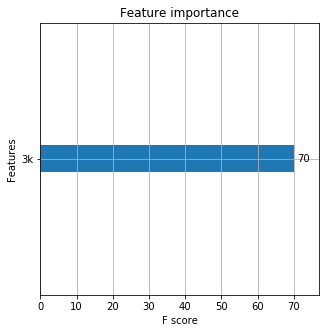

In [27]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

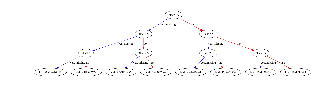

In [28]:
xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [400, 100]
plt.show()